### Aula 10 - Convolutional Neural Networks

In [1]:
import pandas as pd
import numpy as np
from scipy import signal, stats

import matplotlib.pyplot as plt
from ipywidgets import interact
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import plot_model, to_categorical

In [2]:
df_train = pd.read_csv('../dataset/sign_lang_mnist/sign_mnist_train.csv')
df_test = pd.read_csv('../dataset/sign_lang_mnist/sign_mnist_test.csv')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [7]:
# df_train.iloc[linha, coluna]
x_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])

x_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test.iloc[:,0])

In [8]:
x_train.shape, y_train.shape

((27455, 784), (27455,))

In [9]:
x_test.shape, y_test.shape

((7172, 784), (7172,))

In [10]:
'''
No CSV há apenas uma valor para cada pixel, portanto a imagem
está em tons de cinza, com valores de 0 a 255

Para normalizar estes dados para valores entre 0 e 1, basta dividir
cada valor de pixel por 255
'''
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train.max(), x_test.max()

(1.0, 1.0)

In [12]:
'''
Os labels dos dados precisam de atenção especial ao alimentar o modelo
de RNA.

Os valores dos labels estão distribuídos sequencialmente de 0 a 23,
de forma que o modelo fazer correlações que não existem e considerar
as labels como um dado contínuo, desta forma, a letra "A" por ser 0,
estaria próxima de "B" por ser 1, ou ainda que a somatória de duas
letras "B", resultaria na letra "C", este tipo de conjectura dos
dados pode atrapalhar o cálculo de custo e na penalização dos erros
da RNA.

Solução: One hot encoder transforma as labels em um array de valores
conforme abaixo:

Letra A -> [1,0,0,0,...,0]
Letra B -> [0,1,0,0,...,0]

E assim por diante.

'''
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train.shape, y_test.shape

((27455, 25), (7172, 25))

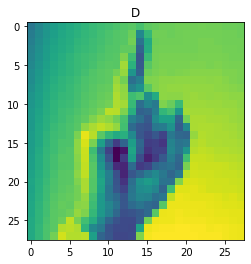

In [14]:
def plot_image(img):
    #plt.imshow(x_train[img, :].reshape(28,28), cmap=plt.cm.binary)
    plt.imshow(x_train[img, :].reshape(28,28))
    plt.title(str(class_names[np.argmax(y_train[img])]))


plot_image(0)

In [15]:
interact(plot_image, img=10)

interactive(children=(IntSlider(value=10, description='img', max=30, min=-10), Output()), _dom_classes=('widge…

<function __main__.plot_image(img)>

#### Rede neural profunda conectada

In [16]:
model = tf.keras.models.Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
'''
Sobre a última camada

Precisa ser 25 por causa da qtde de categorias esperadas na saída

A softmax irá gerar saídas de 0.0 a 1.0 para cada elemento do array de
saída, calculando a probabilidade do dado de entrada ser aquela letra.

A maior probabilidade será retornada pelo argmax()
'''
model.add(Dense(25, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [17]:
'''
batch size = processamento em lotes, define o tamanho dos lotes
que serão inseridos por vez na RNA
Quanto maior o batch, mais rápido o treinamento e o consumo de RAM
'''
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50
215/215 [==============================] - 3s 7ms/step - loss: 2.6986 - accuracy: 0.2034 - val_loss: 2.2104 - val_accuracy: 0.3214
Epoch 2/50
215/215 [==============================] - 1s 6ms/step - loss: 1.8116 - accuracy: 0.4380 - val_loss: 1.7190 - val_accuracy: 0.4782
Epoch 3/50
215/215 [==============================] - 1s 6ms/step - loss: 1.4725 - accuracy: 0.5381 - val_loss: 1.5155 - val_accuracy: 0.4946
Epoch 4/50
215/215 [==============================] - 1s 5ms/step - loss: 1.2672 - accuracy: 0.5940 - val_loss: 1.4337 - val_accuracy: 0.5361
Epoch 5/50
215/215 [==============================] - 1s 6ms/step - loss: 1.1137 - accuracy: 0.6424 - val_loss: 1.3803 - val_accuracy: 0.5449
Epoch 6/50
215/215 [==============================] - 1s 5ms/step - loss: 0.9905 - accuracy: 0.6798 - val_loss: 1.3061 - val_accuracy: 0.5832
Epoch 7/50
215/215 [==============================] - 1s 6ms/step - loss: 0.8896 - accuracy: 0.7120 - val_loss: 1.3263 - val_accuracy: 0.5851
Epoch 

O modelo overfitou, tem uma acurácia de 99%, enquanto que nos dados de teste a acurácia é de 68%

#### Redes neurais Convolucionais


Convolução é o cálculo da similaridade entre duas funções matemáticas.

A integração entre as duas funções ocorre por meio da variação de uma das funções por um elemento $\tau$.

Este processo visa quantificar a similaridade entre duas funções; quanto maior a convolução, maior a similaridade entre as funções.
<break>

\begin{equation}

h(x) = \int_{0}^{x} f(t) . g(t-\tau)

\end{equation}

In [18]:
t = np.linspace(0, 20, 2000)
y1 = signal.sawtooth(2*np.pi*0.3*t, 0.5)

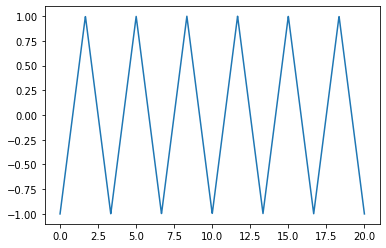

In [19]:
plt.plot(t, y1)

In [20]:
def create_norm(centro):
    y2 = stats.norm.pdf(t, centro, 0.4)
    return y2

In [21]:
y2 = create_norm(10)

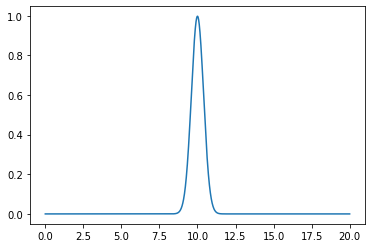

In [22]:
plt.plot(t, y2)

Criadas as funções y1 e y2

Por elas terem o mesmo tamanho t, basta multiplicar uma pela outra
que o python irá calcular a multiplicação ponto a ponto para o
produto destas funções.

Ao aplicar .sum() na multiplicação de duas funções, ele retornará
o resultado da convolução, que é a correlação entre as duas funções

Pela bilbioteca interact é possível alterar o valor do centro de
y2 interativamente, desta forma é possível ver que o valor da
convolução entre as funções altera-se, mostrando que, para 
determinados valores de $\tau$, o valor da convolução é maior ou
menor.

Portanto, é possível perceber que a Convolução é um cálculo de 
similaridade entre duas funções matemáticas.

In [23]:

def plot_conv_function(centro):
    y2 = create_norm(centro)
    plt.plot(t, y1)
    plt.plot(t, y2)
    plt.title(str((y1*y2).sum()))

In [24]:
'''
Convolução é a movimentação da função y2 sobre a y1, por meio
da variação do elemento $\tau$, que neste caso é o centro da 
distribução normal
'''

interact(plot_conv_function, centro=10)

interactive(children=(IntSlider(value=10, description='centro', max=30, min=-10), Output()), _dom_classes=('wi…

<function __main__.plot_conv_function(centro)>

Combinando o código acima com um for, é possível calcular e armazenar o valor do convolução para cada ponto em t

In [25]:
pts = np.linspace(0, 20, 2000)
varredura = np.zeros((2000,))
for i, v in enumerate(pts):
    y2 = create_norm(v)
    varredura[i] = (y1*y2).sum()

In [26]:
def plot_conv_function_all(centro):
    fig, (ax1, ax2) = plt.subplots(2,1)
    y2 = create_norm(centro)
    ax1.plot(t, y1)
    ax1.plot(t, y2)
    ax2.plot(t, varredura)

In [27]:
interact(plot_conv_function_all, centro=10)

interactive(children=(IntSlider(value=10, description='centro', max=30, min=-10), Output()), _dom_classes=('wi…

<function __main__.plot_conv_function_all(centro)>

O gráfico de cima é a plotagem das duas funções com y2 variando sobre y1.

O gfáfico debaixo é a distribuição do valor da convolução, onde é possível percebe que os maiores valores de convolução, acompanham os pontos de maior proximidade entre os plots de y1 e y2.

Convoluções são muito mais úteis para filtrar e encontrar padrões nos dados vizinhos, do que na localização absoluta da distribuição dos dados.

No que se refere à tratamento de imagens, a localização e descoberta de padrões que definem um determiando objeto, como um olho, por exemplo, é a existência de diversas relações convolucionais como essa, que ajudam a definir um padrão para dados vizinhos e não em posições absolutas.

Com relações convolucionais, é possível definiir diversos filtros nos dados para encontrar estes padrões. À título de ilustração, no exemplo utilizado acima, é possível utilizar a convolução para localizar a formação de "picos" nos dados de y1, que são caracterizados por um aumento seguido de queda nos valores, em relação ao eixo y.

#### Conv2D

<p align="center">
<img src = "https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png">
</p>
Credits: IBM https://www.ibm.com/cloud/learn/convolutional-neural-networks

Em convolução de imagens, o funcionamento é o mesmo. Há uma matriz com os pixels da imagem original, equivalente à f(t) e uma matriz filtro, equivalente à g(t), ao qual obtém-se uma matriz resultante desta operação.

Este processo é útil pois permite utilizar diversos filtros para tratamento de imagem.

In [28]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [29]:
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code = cv2.COLOR_BGR2GRAY)
    return image

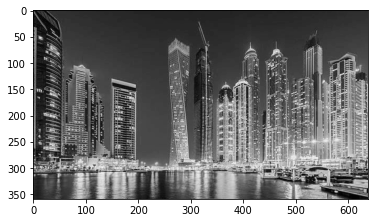

In [30]:
image = processImage('Image.jpeg')
plt.imshow(image, cmap='gray')

In [31]:
image.shape

(359, 638)

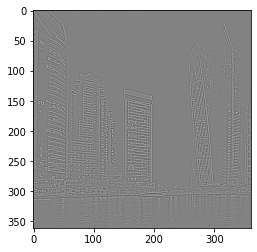

In [33]:
'''
Exemplo de um filtro que detecta arestas
'''
kernel = np.array([
                    [-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2Dconvolved.jpg', output)
plt.imshow(output, cmap='gray')


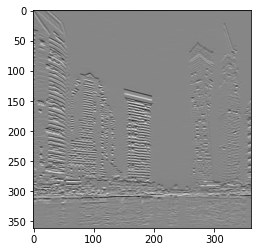

In [34]:
'''
Exemplo de um filtro que detecta arestas horizontais
'''
kernel = np.array([
                    [-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
output = convolve2D(image, kernel, padding=2)
#cv2.imwrite('2Dconvolved.jpg', output)
plt.imshow(output, cmap='gray')


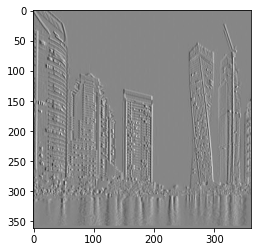

In [36]:
'''
Exemplo de um filtro que detecta arestas verticais
'''
kernel = np.array([
                    [-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
output = convolve2D(image, kernel, padding=2)
#cv2.imwrite('2Dconvolved.jpg', output)
plt.imshow(output, cmap='gray')


### CNN

In [37]:
'''
Fazer o reshape dos dados para criar uma matriz cujo kernel (filtro)
será aplicado
'''
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [40]:
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [44]:
'''
A primeira tem parâmetros diferentes
>filters = 32, significa que ela vai treinar 32 kernels (filtros) para
aprender 32 padrões diferentes
>kernel_size: tamanho da matriz filtro
>padding: quando 'valid' significa sem padding, quando 'same' preenche
a matriz resultante com zeros
>strides: tamanho do "passo" da matriz

A camada MaxPooling serve para diminuir a quantidade de dados gerada
pela camada Conv2D.

A imagem de entrada é uma matriz 28x28.
O kernel é uma matriz 3x3.
O resultado da camada Conv2D são 32 matrizes 25x25 para cada imagem,
o que gerá 20 mil elementos para cada input.

O MaxPooling filtra as matrizes, retornando aqueles que tem valores
altos, ignorando as matrizes com valores baixos.

Na primeira camada convolucional, o modelo extrai algumas relações
básicas, enquanto que na segunda ele aprende padrões mais complexos
a partir dos padrões extraídos da primeira.

'''
model_cnn = tf.keras.models.Sequential()

# camada 1 da rede:
model_cnn.add(Conv2D(filters=32,
                    kernel_size=(3,3),
                    strides=1,
                    input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2,3)))
model_cnn.add(Dropout(0.2))

# camada 2 da rede:
model_cnn.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    strides=1))
model_cnn.add(MaxPooling2D(pool_size=(2,3)))
model_cnn.add(Dropout(0.2))

# Para adicionar camadas Dense, é preciso transformar os dados em
# um array de uma dimensão
model_cnn.add(Flatten())

# agora pode-se adicionar as camadas Dense
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(25, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [45]:
cnn_history = model_cnn.fit(x_train, y_train,
                            batch_size=128,
                            epochs=50,
                            validation_data=(x_test, y_test))

Epoch 1/50
215/215 [==============================] - 48s 17ms/step - loss: 1.9255 - accuracy: 0.4213 - val_loss: 0.7803 - val_accuracy: 0.7485
Epoch 2/50
215/215 [==============================] - 3s 15ms/step - loss: 0.4121 - accuracy: 0.8771 - val_loss: 0.3475 - val_accuracy: 0.8833
Epoch 3/50
215/215 [==============================] - 3s 13ms/step - loss: 0.1404 - accuracy: 0.9610 - val_loss: 0.2716 - val_accuracy: 0.9080
Epoch 4/50
215/215 [==============================] - 3s 13ms/step - loss: 0.0723 - accuracy: 0.9812 - val_loss: 0.2130 - val_accuracy: 0.9328
Epoch 5/50
215/215 [==============================] - 3s 14ms/step - loss: 0.0415 - accuracy: 0.9905 - val_loss: 0.2085 - val_accuracy: 0.9352
Epoch 6/50
215/215 [==============================] - 3s 13ms/step - loss: 0.0275 - accuracy: 0.9935 - val_loss: 0.2211 - val_accuracy: 0.9310
Epoch 7/50
215/215 [==============================] - 3s 13ms/step - loss: 0.0211 - accuracy: 0.9950 - val_loss: 0.1871 - val_accuracy: 0.946

A utilização de duas camadas convolucionais, melhorou a performance da RNA com os dados de teste.